<a href="https://colab.research.google.com/github/maryem-ahmed/MNIST_Classifiction/blob/master/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#for image processing
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

done loading MNIST dataset

In [23]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [24]:
type(X_train)

numpy.ndarray

In [25]:
#shape of the numpy array
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60000 images --
Test data = 10000 images

*   Image Dimension -> 28 * 28
*   Grayscale Image -> 1 channel

In [26]:
#print the 20th image
print(X_train[20])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
  190  25   0   0   0   0   0   0   0   0]
 [  0   0   0  13  25  10   0   0   0   0   0   0   0   0   0   0   0 112
  252 125   4   0   0   0   0   0   0   0]
 [  0   0   0 132 252 113   0   0   0   0   0   0   0   0   0   0   0  61
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 252 238  52   0   0   0   0   0   0   0   

In [27]:
print (X_train[20].shape)

(28, 28)


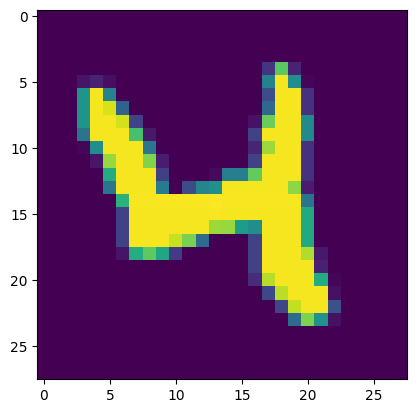

4


In [28]:
plt.imshow(X_train[20])
plt.show()
print(Y_train[20])

In [29]:
print (Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [30]:
print(np.unique(Y_test))
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


all the images are the same dimension in this dataset , we dont have to resize them

In [31]:
#scaling
X_train = X_train/255
X_test = X_test/255

In [ ]:
0/255 = 0
255/255 = 1

In [32]:
print(X_train[20])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**NN building**

In [33]:
#layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
#training NN
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8491 - loss: 0.5247
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9531 - loss: 0.1558
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9667 - loss: 0.1118
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9740 - loss: 0.0884
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9784 - loss: 0.0722
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9823 - loss: 0.0595
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9855 - loss: 0.0501
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9880 - loss: 0.0424
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9897 - loss: 0.0361
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9901 - loss: 0.0342


Training data accuracy is = 0.99

**Accuracy on the Test Data:**

In [36]:
loss , accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9636 - loss: 0.1471
0.9682000279426575


Training data accuracy is = 0.96

In [37]:
print (X_test.shape)

(10000, 28, 28)


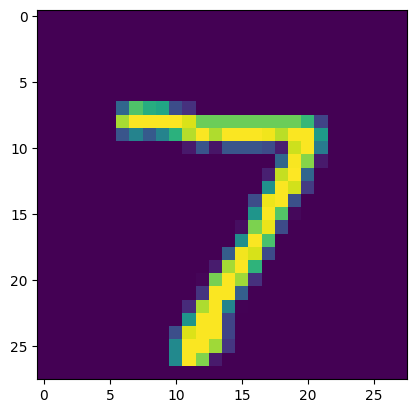

In [38]:
plt.imshow(X_test[0])
plt.show()

In [39]:
print(Y_test[0])

7


In [40]:
y_pred = model.predict(X_test)
print(y_pred.shape)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
(10000, 10)


In [41]:
print(y_pred[0])

[5.3217113e-03 8.5532693e-06 2.2295462e-01 2.2629154e-01 2.8526513e-06
 1.0430375e-03 1.2651407e-12 9.9999100e-01 1.5942872e-02 5.4590907e-02]


model.predict - gives the prediction probability of each class for the data point but i want to convet it to class labels

In [42]:
label_for_st_image = np.argmax(y_pred[0])
print(label_for_st_image)

7


so 7 is the max index

In [43]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

ytest is true labels and y_perd_labels are the predicted labels

In [44]:
confusion_mat = confusion_matrix(Y_test,y_pred_labels)
print(confusion_mat)

tf.Tensor(
[[ 955    0    2    1    3    2    4    5    0    8]
 [   0 1115    3    2    0    2    5    1    7    0]
 [   4    0  987   10    1    1    6   12   11    0]
 [   0    0    2  988    0    3    0    8    7    2]
 [   0    0    2    0  966    0    5    4    2    3]
 [   3    0    0   22    1  845    8    2   10    1]
 [   3    3    2    2    4    1  939    0    4    0]
 [   1    0    5    2    0    0    0 1005    2   13]
 [   1    1    4    8    5    4    7    4  937    3]
 [   1    2    2    8   30    4    0    6   11  945]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

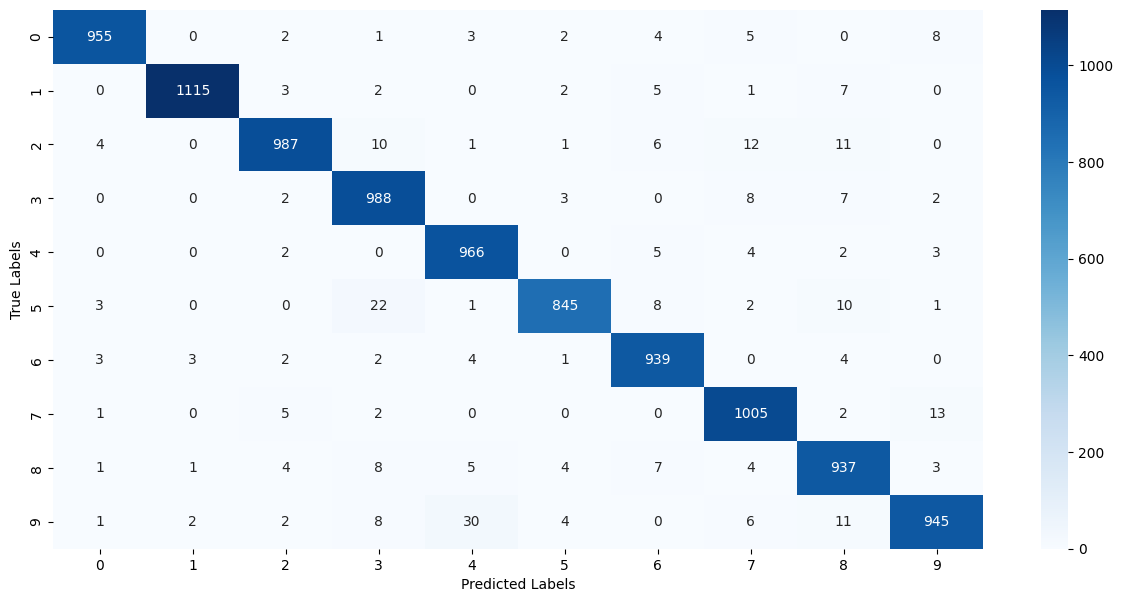

In [45]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

I will try to build a predictive system

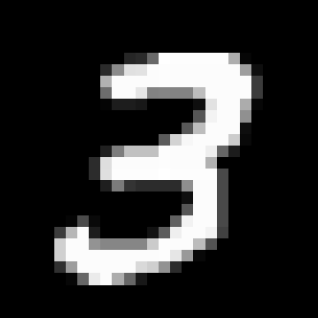

In [46]:
input_image = "/content/MNIST_digit.png"
input_img = cv2.imread(input_image)
cv2_imshow(input_img)

In [47]:
input_img.shape

(318, 318, 3)

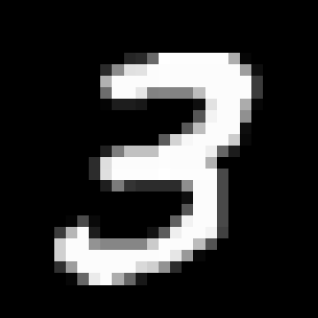

In [48]:
grayscale = cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

In [49]:
grayscale.shape

(318, 318)

In [51]:
input_img_resize = cv2.resize(grayscale,(28,28))
input_img_resize.shape

(28, 28)

In [52]:
cv2_imshow(input_img_resize)

In [53]:
input_img_resize = input_img_resize/255

In [54]:
img_reshape = np.reshape(input_img_resize,[1,28,28])

In [55]:
input_prediction = model.predict(img_reshape)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[7.1472706e-18 5.2176032e-02 1.1781904e-02 1.0000000e+00 2.5007287e-18
  1.5231306e-03 6.8505019e-34 5.2700801e-07 6.1359961e-02 1.2760727e-02]]


In [56]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


**Predictive System**

Path of the image to be predicted: /content/MNIST_digit.png


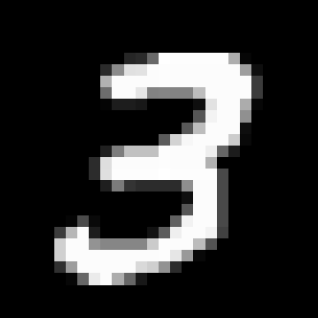

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The Handwritten Digit is recognised as  3


In [57]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)